In [1]:
import pandas as pd
from datautils import _get_time_features,load_forecast_csv

In [2]:
#data, train_slice, valid_slice, test_slice, scaler, pred_lens, n_covariate_cols,data1=load_forecast_csv("mocap",False)
data, train_slice, valid_slice, test_slice, scaler, pred_lens, data1=load_forecast_csv("mocap_number",False)

data
(1285, 4)
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284],
      dtype='int64', name='date', length=1285)
(1285, 4)
data
(1285, 4)
slice(None, 771, None)
slice(771, 1028, None)
slice(1028, None, None)
(1, 1285, 4)


/Users/katoutsubasa/ts2vec/datautils.py:140: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(f'datasets/{name}.csv', index_col='date', parse_dates=True)


In [3]:
data.shape

(1, 1285, 4)

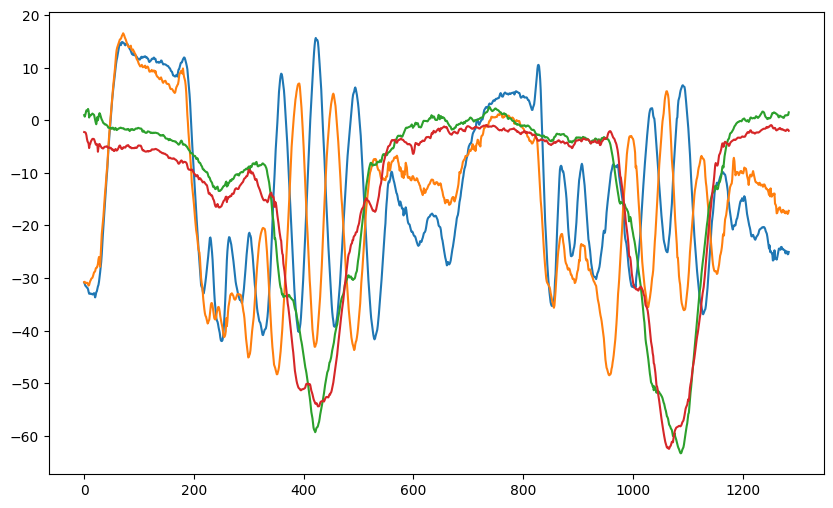

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data1)

In [5]:
data.shape[1]

1285

In [6]:
!pip install tensorflow

In [7]:
import random
import numpy as np
import torch

def torch_fix_seed(seed=42):
    # Python random
    random.seed(seed)
    # Numpy
    np.random.seed(seed)
    # Pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    #torch.use_deterministic_algorithms = True


torch_fix_seed()

In [8]:
from ts2vec import TS2Vec
model = TS2Vec(
    input_dims=data.shape[-1],
    device="cpu",
    output_dims=320,
    input_total=1,
    #max_train_length=300,
    #output_dims=10
)
loss_log = model.fit(
    data,
    verbose=True,
    n_iters=600,
    save_model="no_pros_k5.pth"
)

(320, 1206)
(320, 1188)
loss
tensor(84.5461, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(2227.8271) tensor(2113.8037)
Best model updated: loss=4426.1767578125
Epoch #0: loss=4426.1767578125
(320, 1030)
(320, 963)
loss
tensor(49.4284, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(1203.6421) tensor(1097.1595)
Best model updated: loss=2350.230224609375
Epoch #1: loss=2350.230224609375
(320, 310)
(320, 771)
loss
tensor(16.6502, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(314.5700) tensor(551.2179)
Best model updated: loss=882.4380493164062
Epoch #2: loss=882.4380493164062
(320, 274)
(320, 808)
loss
tensor(8.5678, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(176.6220) tensor(476.5821)
Best model updated: loss=661.7719116210938
Epoch #3: loss=661.7719116210938
(320, 735)
(320, 806)
loss
tensor(15.1044, grad_fn=<DivBackward0>)
loss_k1,loss_k2
tensor(344.1632) tensor(384.5724)
Epoch #4: loss=743.8400268554688
(320, 914)
(320, 638)
loss
tensor(8.8455, grad_fn=<DivBackward0>)
loss_k1,lo

In [9]:
model.load('no_pros_k5.pth')

In [10]:
all_repr = model.encode(
        data,
        causal=False,
        sliding_length=1,
        sliding_padding= 200,
        batch_size=256
    )

a
(320, 401)
(320, 401)
(320, 401)
(320, 401)
(320, 401)
(320, 401)


In [11]:
test_repr = all_repr[:, test_slice]
print(test_repr)

[[[-0.03320028  0.04578191  0.10454869 ... -0.02115493 -0.006172
    0.19298832]
  [-0.03209443  0.04987875  0.1079917  ... -0.01812905 -0.00574264
    0.20020415]
  [-0.03108704  0.05398072  0.11051568 ... -0.01482831 -0.00499264
    0.20651022]
  ...
  [ 0.00356153 -0.01264832 -0.04479246 ... -0.03999303 -0.0175362
   -0.05725343]
  [-0.00081532 -0.01575761 -0.04856452 ... -0.04042196 -0.01758891
   -0.04969292]
  [-0.00281179 -0.02253047 -0.04966034 ... -0.03370182 -0.00946796
   -0.05072264]]]


In [12]:
all_repr.shape

(1, 1285, 320)

In [13]:
test_repr.shape

(1, 257, 320)

In [14]:
test_2d = all_repr.reshape(1285, 320)

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
import numpy as np
data_test=data1

In [17]:
data_test.shape

(1285, 4)

In [18]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [19]:
dbscan.fit(test_2d)
labels = dbscan.labels_

In [20]:
date=data_test.index
date_list=date.tolist()

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_51053/583540433.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


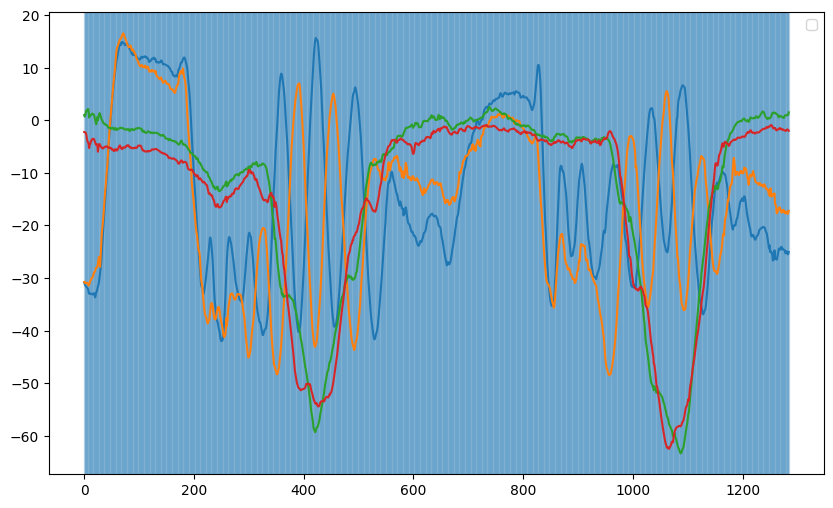

In [21]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClusteringオブジェクトの作成。ここではクラスタ数を3としています。
agg_clustering = AgglomerativeClustering(n_clusters=5)

# フィッティングとラベルの予測を行います
agg_clustering.fit(test_2d)
labels = agg_clustering.labels_

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_51053/1211746902.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


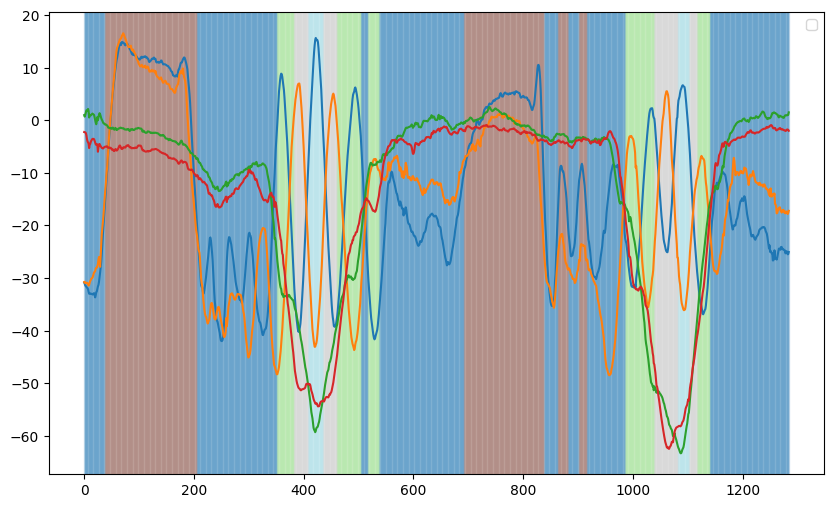

In [23]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [24]:
from sklearn.cluster import KMeans

# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=5)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_51053/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


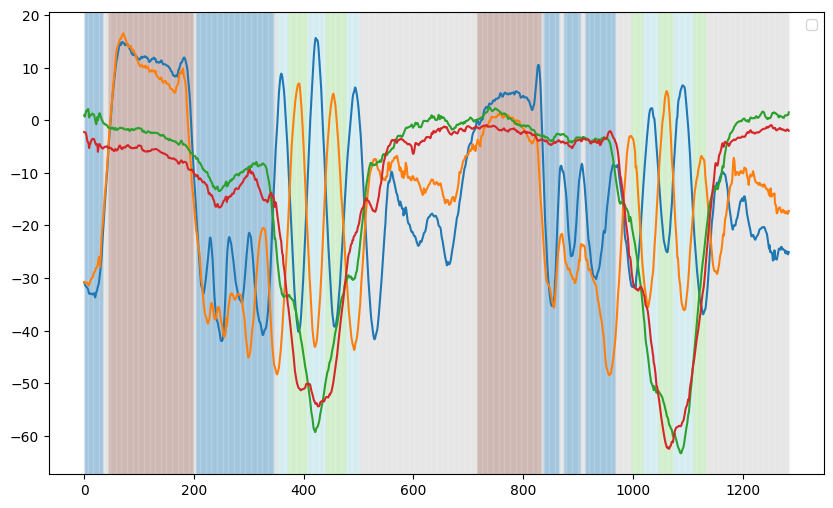

In [25]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_51053/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


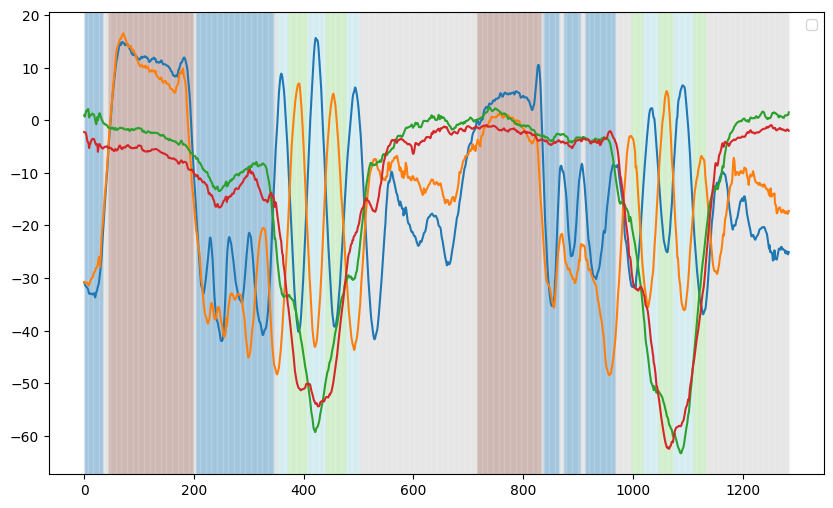

In [26]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

In [27]:
from sklearn.cluster import KMeans

# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=4)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_51053/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


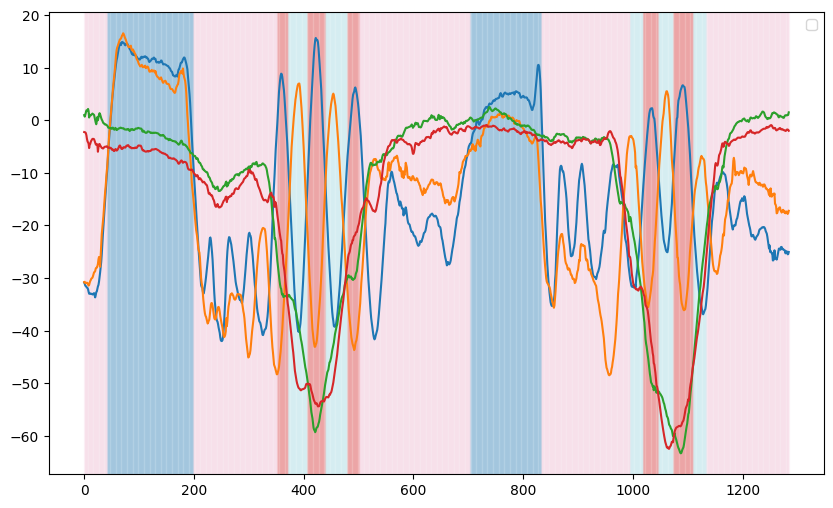

In [28]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

In [29]:
# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=3)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_51053/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


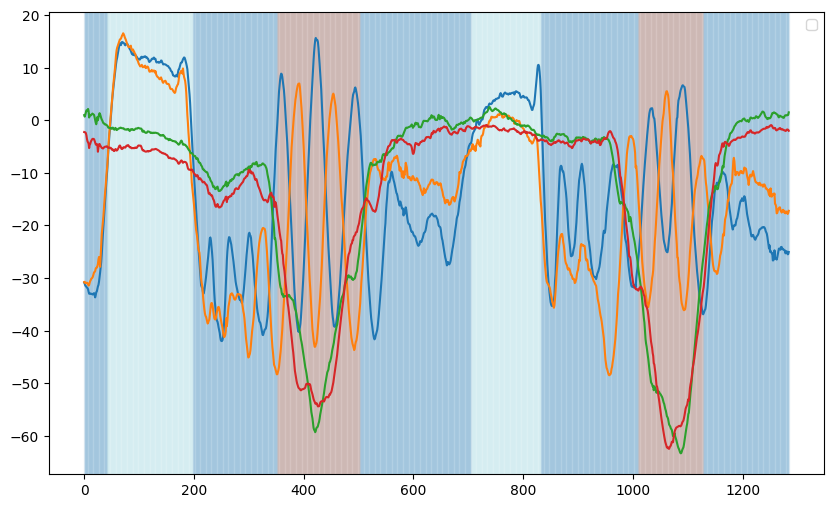

In [30]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

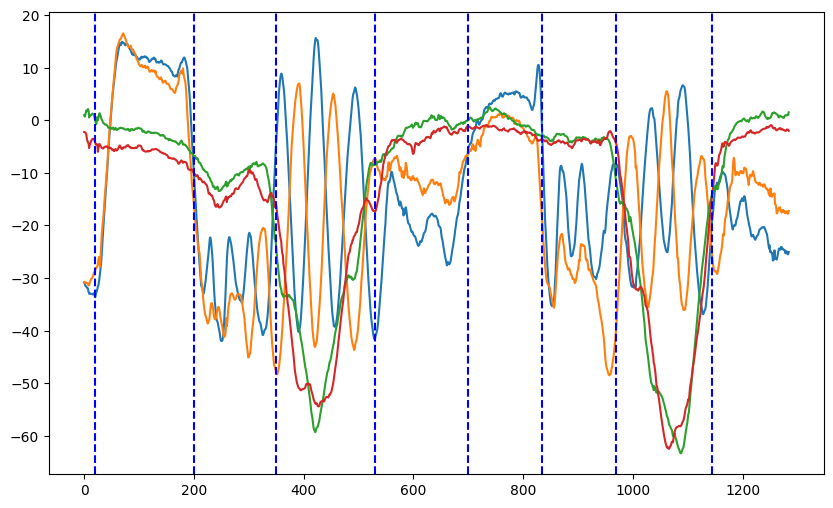

In [31]:
# 日付をエポック秒に変換
data_test_copy=data_test.copy()
# dateを1,2,3,...に変更
data_test_copy.reset_index(drop=True, inplace=True)
#data_test_copy['date'] = range(1, len(data_test_copy) + 1)
data_test_copy
plt.figure(figsize=(10, 6))
plt.plot(data_test_copy) 
plt.axvline(x=19, color='b', linestyle='--')
plt.axvline(x=200, color='b', linestyle='--')
plt.axvline(x=350, color='b', linestyle='--')
plt.axvline(x=530, color='b', linestyle='--')
plt.axvline(x=700, color='b', linestyle='--')
plt.axvline(x=835, color='b', linestyle='--')
plt.axvline(x=970, color='b', linestyle='--')
plt.axvline(x=1145, color='b', linestyle='--')

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_51053/1855845376.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)


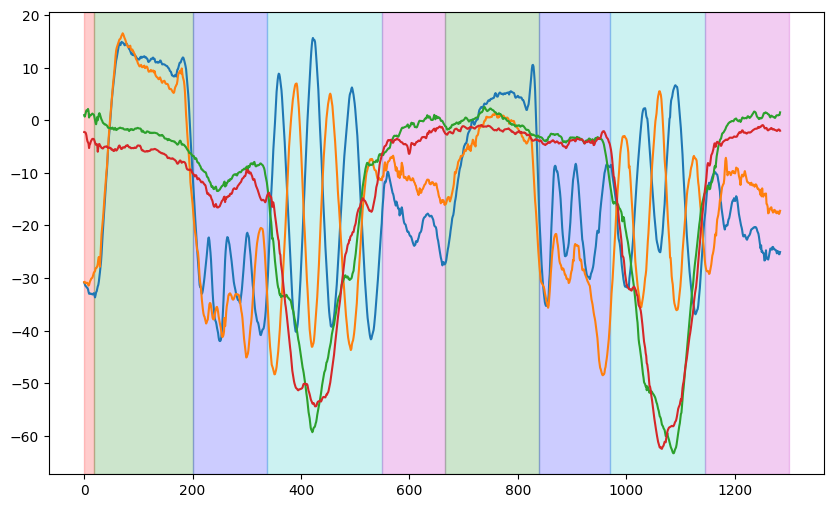

In [32]:
# 日付をエポック秒に変換
data_test_copy=data_test.copy()
# dateを1,2,3,...に変更
data_test_copy.reset_index(drop=True, inplace=True)
#data_test_copy['date'] = range(1, len(data_test_copy) + 1)
data_test_copy
plt.figure(figsize=(10, 6))

regime_list=[0,19,200,338,550,665,840,970,1145,1300]
colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]
plt.plot(data_test_copy) 
num_clusters = len(set(regime_list))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
for i in range(len(regime_list)-1):
    plt.axvspan(regime_list[i], regime_list[i+1], color=colors[i], alpha=0.2)

In [33]:
from sklearn.manifold import TSNE
regime_list=[0,19,200,338,550,665,840,970,1145,1300]
# t-SNEのモデルを作成
tsne = TSNE(n_components=3, random_state = 0, perplexity = 30, n_iter = 10000)

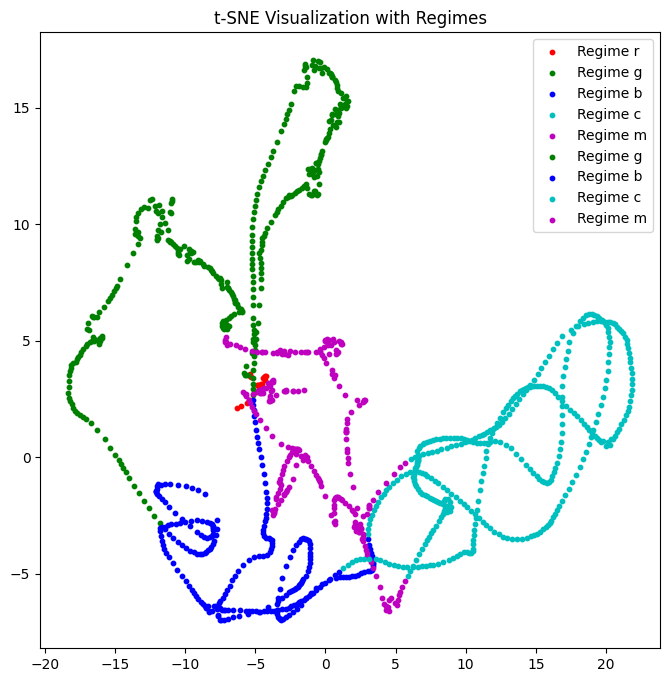

In [34]:
# 高次元データを低次元に変換
data_tsne = tsne.fit_transform(test_2d)
regime_label=[0,1,2,3,4,1,2,3,4,5]

# 各regimeごとに色を指定
colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]

# プロット
plt.figure(figsize=(8, 8))

for i in range(len(regime_list) - 1):
    start_idx = regime_list[i]
    end_idx = regime_list[i + 1]
    plt.scatter(
        data_tsne[start_idx:end_idx, 0],
        data_tsne[start_idx:end_idx, 1],
        color=colors[i],
        label=f"Regime {colors[i]}",
        s=10
    )
plt.title("t-SNE Visualization with Regimes")
plt.legend()
plt.show()

In [35]:
from sklearn.manifold import TSNE
regime_list=[0,19,200,338,550,665,840,970,1145,1300]
# t-SNEのモデルを作成
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 10000)

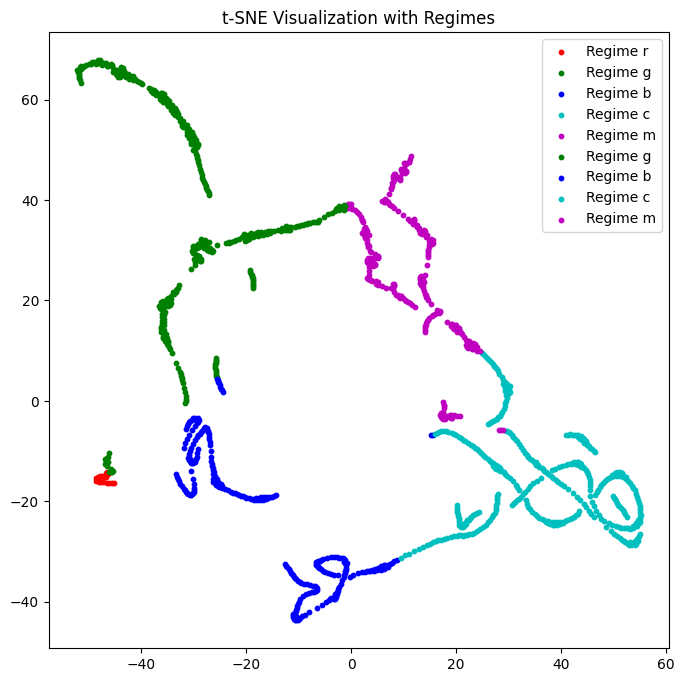

In [36]:
# 高次元データを低次元に変換
data_tsne = tsne.fit_transform(test_2d)
regime_label=[0,1,2,3,4,1,2,3,4,5]

# 各regimeごとに色を指定
colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]

# プロット
plt.figure(figsize=(8, 8))

for i in range(len(regime_list) - 1):
    start_idx = regime_list[i]
    end_idx = regime_list[i + 1]
    plt.scatter(
        data_tsne[start_idx:end_idx, 0],
        data_tsne[start_idx:end_idx, 1],
        color=colors[i],
        label=f"Regime {colors[i]}",
        s=10
    )
plt.title("t-SNE Visualization with Regimes")
plt.legend()
plt.show()